# Reading The Data
- Using pynwb

In [1]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count

# Exploring functionalies of nwb module

In [2]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("../M440959/sub-440959_ses-20190219T121506_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

# nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

In [3]:
nwbfile.subject

subject pynwb.file.Subject at 0x2306648847984
Fields:
  age__reference: birth
  date_of_birth: 2018-10-09 00:00:00-05:00
  description: SC011
  sex: M
  species: Mus musculus
  subject_id: 440959

In [4]:
import glob
nwb_files = glob.glob("..\M440959\*.nwb")
nwb_io = []

for name in nwb_files:
    io = NWBHDF5IO(name, mode="r").read()
    nwb_io.append(io)
    
trials_df = []
for i in range(len(nwb_files)):
    trials_df.append(nwb_io[i].trials.to_dataframe().drop(['trial','task','trial_uid', 'photostim_power','photostim_duration','auto_water', 'free_water'],axis=1))
    trials_df[i]['ses_no'] = i+1

In [5]:
trials_df[0]

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no
id,,,,,,,,
0,0.0000,4.9360,N/A,1,right,no early,ignore,1
1,6.7260,11.8657,N/A,1,right,no early,hit,1
2,13.6555,18.5318,N/A,1,right,no early,hit,1
3,21.4022,26.7820,N/A,1,right,early,hit,1
4,28.5703,33.5929,N/A,1,right,early,hit,1
...,...,...,...,...,...,...,...,...
432,2879.2838,2884.2803,N/A,1,right,no early,ignore,1
433,2886.5034,2891.3455,N/A,1,right,no early,ignore,1
434,2893.5810,2898.4552,N/A,1,right,no early,ignore,1


In [6]:
units_df = []
for i in range(len(nwb_files)):
    units_df.append(nwb_io[i].units.to_dataframe().query("classification == 'good'").reset_index())
    units_df[i]['ses_no'] = i+1

In [7]:
units_df[1]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no
0,15,16,30000,good,11.0,620.0,89.592968,3.675517,0.000000,1.718540,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.23948423188059875, 0.24238424770985212, 0.5...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[3.820389009793254, 3.580658324265506, 3.54495...",[nan],2
1,19,20,30000,good,59.0,600.0,113.271202,3.915653,0.178284,0.997296,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.13291698353436843, 0.5872861302992942, 0.70...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.3690715434083602, 1.4519694533762058, 1.429...",[nan],2
2,22,23,30000,multi,43.0,660.0,141.211541,5.397138,1.000000,1.037650,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[1.4793243326744825, 2.467629727174761, 14.122...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[4.453366374871267, 4.844393666323378, 5.00852...",[nan],2
3,30,32,30000,good,27.0,1320.0,118.126055,4.911891,0.088625,0.949729,...,good,"Orbital area, ventrolateral part, layer 1","[True, True, True, True, True, True, True, Tru...","[2.8925320464332533, 3.037466170865349, 4.5328...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.141556524184477, 0.421822272215973, 0.11600...",[nan],2
4,38,41,30000,good,59.0,1560.0,52.923387,2.204611,0.000000,0.496777,...,good,"Orbital area, ventrolateral part, layer 2/3","[True, True, True, True, True, True, True, Tru...","[5.019076987157721, 7.14661791582279, 32.78610...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.8195564516129032, 1.7867943548387095, 2.247...",[nan],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,638,101,30000,multi,27.0,2760.0,90.643448,3.046899,0.259714,5.204760,...,good,Postsubiculum,"[True, True, True, True, True, True, True, Tru...","[0.5106656799346663, 0.5774665557676291, 0.705...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.15881673511293634, 0.39704183778234087, 1....",[nan],2
144,644,108,30000,good,59.0,2800.0,241.211180,6.656883,0.161416,0.860201,...,good,Postsubiculum,"[True, True, True, True, True, True, True, Tru...","[3.5271385625456104, 17.407576965133703, 21.58...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.26785714285714285, -0.6434394409937888, -0...",[nan],2
145,679,143,30000,good,11.0,3660.0,139.397659,3.646890,0.231812,1.060620,...,good,"Primary visual area, layer 6a","[True, True, True, True, True, True, True, Tru...","[8.665649549464154, 14.284636019942678, 14.411...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.685989425981873, 2.315426737160121, 1.88113...",[nan],2
146,693,157,30000,multi,59.0,1560.0,91.408686,4.907875,1.000000,0.257072,...,good,Midbrain reticular nucleus,"[True, True, True, True, True, True, True, Tru...","[0.3587303545620881, 8.248044074197008, 8.6948...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[5.998245841995843, 6.400240384615385, 6.58783...",[nan],2


# Data Cleaning

In [16]:
import ast

In [17]:
units_df[1].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

left Thalamus    95
left ALM         30
left Midbrain    23
Name: electrodes, dtype: int64

In [18]:
units_df[1]['anno_name'].unique()

array(['Anterior olfactory nucleus',
       'Orbital area, ventrolateral part, layer 1',
       'Orbital area, ventrolateral part, layer 2/3',
       'Orbital area, ventrolateral part, layer 5',
       'Orbital area, lateral part, layer 5', 'Frontal pole, layer 5',
       'Secondary motor area, layer 2/3', 'Secondary motor area, layer 1',
       'Hypothalamus', 'Zona incerta',
       'Ventral medial nucleus of the thalamus',
       'Ventral anterior-lateral complex of the thalamus', 'Thalamus',
       'Anteroventral nucleus of thalamus',
       'Central lateral nucleus of the thalamus',
       'Lateral dorsal nucleus of thalamus', 'Field CA3', 'Field CA2',
       'Field CA1', 'Midbrain',
       'Superior colliculus, motor related, intermediate gray layer',
       'Postsubiculum', 'Primary visual area, layer 6a',
       'Midbrain reticular nucleus'], dtype=object)

## Making Data Useable

In [19]:
pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = [],[],[],[],[],[],[],[]
for name in nwb_files:  
    with NWBHDF5IO(name, "r") as io:
        read_nwbfile = io.read()
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_start_times"].timestamps[:4])
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_stop_times"].timestamps[:4])
        pre_start.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:])
        pre_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:])
        sample_start.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:])
        sample_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:])
        delay_start.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:])
        delay_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:])
        go_start.append(read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:])
        go_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:])
print(len(pre_stop[1]),len(trials_df[1]))
      
      
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
    for i in range(len(pre_start)):
        sample_start[i] = np.intersect1d(pre_stop[i], sample_start[i])
        sample_stop[i] = np.intersect1d(sample_stop[i], delay_start[i])
        delay_start[i] = np.intersect1d(delay_start[i], sample_stop[i])
        delay_stop[i] = np.intersect1d(delay_stop[i], go_start[i])
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

525 525


In [20]:
len(sample_start[0])

0

In [21]:
for i in range(len(nwb_files)):
    trials_df[i] = trials_df[i].assign(pre_start = pre_start[i],
                             pre_stop = pre_stop[i],
                             sample_start = pre_stop[i],
                             sample_stop = sample_stop[i],
                             delay_start = delay_start[i],
                             delay_stop = delay_stop[i],
                             go_start = go_start[i],
                             go_stop = go_stop[i])
    units_df[i]['Region'] = units_df[i].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])
units_df[0]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
0,4,4,30000,good,59.0,0.0,213.343917,6.604437,0.018930,2.243550,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.08204999718956829, 0.08491667950354254, 0.4...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[5.341744652406417, 5.587399732620321, 6.00852...",[nan],1,left ALM
1,7,7,30000,good,59.0,40.0,160.905469,4.752210,0.004433,17.825700,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.001982893489960613, 0.16175043222110919, 0....","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.7117187499999997, 2.221875, 1.7859375, 1.35...",[nan],1,left ALM
2,9,9,30000,good,11.0,60.0,383.840332,11.737402,0.000000,2.631710,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.2629509846074578, 0.2938511532708783, 0.486...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-6.87744140625, -7.44873046875, -8.212890625,...",[nan],1,left ALM
3,10,10,30000,good,43.0,60.0,230.789218,6.761355,0.000000,1.546450,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.43111856918885705, 0.7356535647757081, 0.87...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.520440687361419, 2.458079268292683, 2.53083...",[nan],1,left ALM
4,12,12,30000,good,43.0,100.0,229.807632,7.607414,0.000651,31.724200,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.0035162351927837676, 0.01961632307243022, 0...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.529836683417085, 1.8043341708542713, 1.8373...",[nan],1,left ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,815,189,30000,good,59.0,3640.0,155.194986,6.654900,0.169057,4.587180,...,"Primary visual area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.07379318443355398, 0.08185995686448067, 0.1...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[3.5450444560669454, 3.684786872384937, 3.7828...",[nan],1,left Midbrain
192,820,195,30000,good,43.0,3700.0,245.385742,10.068515,0.000000,6.907870,...,"Primary visual area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.03162596490825509, 0.0405594153689508, 0.04...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.64208984375, -0.47119140625, -0.6909179687...",[nan],1,left Midbrain
193,832,207,30000,good,43.0,3820.0,138.906796,5.230454,0.043104,1.765200,...,"Primary visual area, layer 5","[True, True, True, True, True, True, True, Tru...","[0.23652865140786838, 0.5234990805725288, 1.21...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.237652972027972, -0.3223339160839161, -0.54...",[nan],1,left Midbrain
194,847,222,30000,good,11.0,3260.0,155.663670,5.550499,0.073075,2.385830,...,Postsubiculum,"[True, True, True, True, True, True, True, Tru...","[0.09552680271852987, 0.12352716983414336, 0.1...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.9308664486921527, 2.5724660462776656, 2.419...",[nan],1,left Midbrain


In [22]:
#Aggregating Data
trial_result = pd.DataFrame()
unit_result = pd.DataFrame()
for i in range(len(nwb_files)):
    trial_result = pd.concat([trial_result, trials_df[i]])
    unit_result = pd.concat([unit_result, units_df[i]])
trial_result

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
0,0.0000,4.9360,N/A,1,right,no early,ignore,1,0.5000,0.5100,0.5100,1.9360,1.9360,3.1360,3.1360,3.1860
1,6.7260,11.8657,N/A,1,right,no early,hit,1,7.2260,7.2360,7.2360,8.7835,8.7835,9.9835,9.9835,10.0335
2,13.6555,18.5318,N/A,1,right,no early,hit,1,14.1555,14.1655,14.1655,15.6559,15.6559,16.8559,16.8559,16.9059
3,21.4022,26.7820,N/A,1,right,early,hit,1,21.9022,21.9122,21.9122,23.3770,23.3770,25.0941,25.0941,25.1441
4,28.5703,33.5929,N/A,1,right,early,hit,1,29.0703,29.0803,29.0803,30.7449,30.7449,31.9449,31.9449,31.9949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,3700.6841,3705.6419,N/A,1,left,no early,hit,2,3701.1841,3701.1941,3701.1941,3702.6939,3702.6939,3703.8939,3703.8939,3703.9439
521,3707.9691,3713.0272,2.058,1,left,no early,ignore,2,3708.4691,3708.4791,3708.4791,3710.0272,3710.0272,3711.2272,3711.2272,3711.2772
522,3715.3508,3720.3410,N/A,1,left,no early,ignore,2,3715.8508,3715.8608,3715.8608,3717.3410,3717.3410,3718.5410,3718.5410,3718.5910


In [23]:
units_df_ag = unit_result
trials_df_ag = trial_result
units_df_ag["Region"].unique()

array(['left ALM', 'left Thalamus', 'left Midbrain'], dtype=object)

## Spike Rate Plotting

In [24]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'left ALM' and classification == 'good'")

In [25]:
units_Data

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
0,4,4,30000,good,59.0,0.0,213.343917,6.604437,0.018930,2.24355,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.08204999718956829, 0.08491667950354254, 0.4...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[5.341744652406417, 5.587399732620321, 6.00852...",[nan],1,left ALM
1,7,7,30000,good,59.0,40.0,160.905469,4.752210,0.004433,17.82570,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.001982893489960613, 0.16175043222110919, 0....","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.7117187499999997, 2.221875, 1.7859375, 1.35...",[nan],1,left ALM
2,9,9,30000,good,11.0,60.0,383.840332,11.737402,0.000000,2.63171,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.2629509846074578, 0.2938511532708783, 0.486...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-6.87744140625, -7.44873046875, -8.212890625,...",[nan],1,left ALM
3,10,10,30000,good,43.0,60.0,230.789218,6.761355,0.000000,1.54645,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.43111856918885705, 0.7356535647757081, 0.87...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.520440687361419, 2.458079268292683, 2.53083...",[nan],1,left ALM
4,12,12,30000,good,43.0,100.0,229.807632,7.607414,0.000651,31.72420,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.0035162351927837676, 0.01961632307243022, 0...","[[0.0, 4.936], [6.726, 11.8657], [13.6555, 18....",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.529836683417085, 1.8043341708542713, 1.8373...",[nan],1,left ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,162,165,30000,good,27.0,1800.0,90.848341,3.510327,0.145385,1.87568,...,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[1.4552908681584886, 1.639291872497304, 1.6971...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.23757830296127563, 0.14147921412300682, 0.5...",[nan],2,left ALM
26,166,169,30000,good,59.0,2080.0,95.338983,3.717001,0.089322,3.27836,...,"Frontal pole, layer 5","[True, True, True, True, True, True, True, Tru...","[0.1972840015376751, 0.38481835849604007, 0.41...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.5969941737288136, 2.6590638241525424, 2.760...",[nan],2,left ALM
27,171,174,30000,multi,43.0,2180.0,145.341981,6.077953,0.000000,2.03949,...,"Frontal pole, layer 5","[True, True, True, True, True, True, True, Tru...","[47.69325281479661, 47.69871951130233, 51.2926...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[4.375491352201258, 4.235455974842767, 3.95784...",[nan],2,left ALM
28,181,184,30000,multi,59.0,2080.0,113.495662,4.330282,0.202085,1.77840,...,"Frontal pole, layer 5","[True, True, True, True, True, True, True, Tru...","[0.017749688246214923, 1.3704570717740165, 1.6...","[[0.0, 5.1223], [6.9136, 11.7023], [13.5671, 1...",...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[6.030658517350157, 5.133576498422713, 3.68197...",[nan],2,left ALM


# New data based on Delay range [1.0,1.2]




In [26]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")
trials_Data

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
1,6.7260,11.8657,N/A,1,right,no early,hit,1,7.2260,7.2360,7.2360,8.7835,8.7835,9.9835,9.9835,10.0335
2,13.6555,18.5318,N/A,1,right,no early,hit,1,14.1555,14.1655,14.1655,15.6559,15.6559,16.8559,16.8559,16.9059
4,28.5703,33.5929,N/A,1,right,early,hit,1,29.0703,29.0803,29.0803,30.7449,30.7449,31.9449,31.9449,31.9949
9,58.4139,63.2594,N/A,1,left,no early,hit,1,58.9139,58.9239,58.9239,60.3130,60.3130,61.5130,61.5130,61.5630
10,65.1150,70.2301,N/A,1,left,no early,hit,1,65.6150,65.6250,65.6250,67.1732,67.1732,68.3732,68.3732,68.4232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,3608.8725,3613.8751,N/A,1,left,no early,hit,2,3609.3725,3609.3825,3609.3825,3610.7851,3610.7851,3611.9851,3611.9851,3612.0351
509,3616.2004,3621.0991,N/A,1,left,no early,hit,2,3616.7004,3616.7104,3616.7104,3618.0980,3618.0980,3619.2980,3619.2980,3619.3480
511,3633.1094,3637.9340,N/A,1,left,no early,hit,2,3633.6094,3633.6194,3633.6194,3635.0440,3635.0440,3636.2440,3636.2440,3636.2940


# Plotting with phases

In [27]:
def get_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    #plt.plot(edges[1:],freq)
    
    #return freq,edges[1:],smooth_gauss
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

In [28]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

# def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
#     after = 4.35
#     before = -0.7
#     spike_data = []
    
#     for unit in units_Data.reset_index()['id'][:20]:
#         unit_spike_times = units_Data["spike_times"][unit]
#         trial_spikes_l = []
#         trial_spikes_r = []
#         i = 0
#         for time in Trial_Data1['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes1 = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
#             aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
#             trial_spikes_l.append(aligned_spikes1)
            
#         for time in Trial_Data2['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes = aligned_spikes[aligned_spikes < after ]
#             aligned_spikes = aligned_spikes[before < aligned_spikes]
#             trial_spikes_r.append(aligned_spikes)            
            
#         fig, axs = plt.subplots(1, 1, sharex="all")
        
        
#         plt.xlabel("time (s)")
        
#         get_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
#         get_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
#         axs.set_ylabel("Freq (Hz)")
#         axs.axvline(0, color=[0.5, 0.5, 0.5])
#         axs.axvline(0.65, color=[0.5, 0.5, 0.5])
#         axs.axvline(1.85, color=[0.5, 0.5, 0.5])
#         axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
#         axs.text(0.1,0,'Sample',rotation=90)
#         axs.text(0.75,0,'Delay',rotation=90)
#         axs.text(1.95,0,'Go',rotation=90)
#         axs.text(-0.4,0,'Pre-Sample',rotation=90)
# get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [29]:
len(trials_Data_L),len(trials_Data_R)

(222, 148)

In [30]:
def get_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for session in range(1,len(nwb_files)+1):
        temp_data_l = Trial_Data1.query("ses_no == @session") 
        temp_data_r = Trial_Data2.query("ses_no == @session") 
        temp_unit = units_Data.query("ses_no == @session")
        for unit in temp_unit.reset_index()['index']:
            unit_spike_times = temp_unit["spike_times"][unit]
            trial_spikes_l = []
            trial_spikes_r = []
            i = 0
            for time in temp_data_l['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_l.append(aligned_spikes)

            frq_l,edges,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,temp_data_l)    
            spike_data_l.append(smooth_l)

            for time in temp_data_r['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_r.append(aligned_spikes)

            frq_r,edges,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,temp_data_r)    
            spike_data_r.append(smooth_r)    
    return spike_data_l,spike_data_r,edges

l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

In [34]:
#%pip install pickle-mixin
import pickle
with open('440959_l.pkl', 'wb') as f:
    pickle.dump(l, f)
with open('440959_r.pkl', 'wb') as f:
    pickle.dump(r, f)

In [35]:
#Loading The data
with open('440959_l.pkl', 'rb') as f:
    l = pickle.load(f)
with open('440959_r.pkl', 'rb') as f:
    r = pickle.load(f)

In [23]:
# avg_left_rate = np.array(l).mean(axis=0)
# avg_right_rate = np.array(r).mean(axis=0)


# fig, axs = plt.subplots(1, 1, sharex="all")
# axs.plot(edges,avg_left_rate,c='r')
# axs.plot(edges,avg_right_rate,c='b')
# axs.axvline(0, color=[0.5, 0.5, 0.5])
# axs.axvline(0.65, color=[0.5, 0.5, 0.5])
# axs.axvline(1.85, color=[0.5, 0.5, 0.5])
# axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,0,'Sample',rotation=90)
# axs.text(0.75,0,'Delay',rotation=90)
# axs.text(1.95,0,'Go',rotation=90)
# axs.text(-0.4,0,'Pre-Sample',rotation=90)
# axs.set_ylabel("Freq (Hz)")
# axs.legend(['Left','Right'])
# plt.show()

In [36]:
edges[569:690]

array([1.85 , 1.855, 1.86 , 1.865, 1.87 , 1.875, 1.88 , 1.885, 1.89 ,
       1.895, 1.9  , 1.905, 1.91 , 1.915, 1.92 , 1.925, 1.93 , 1.935,
       1.94 , 1.945, 1.95 , 1.955, 1.96 , 1.965, 1.97 , 1.975, 1.98 ,
       1.985, 1.99 , 1.995, 2.   , 2.005, 2.01 , 2.015, 2.02 , 2.025,
       2.03 , 2.035, 2.04 , 2.045, 2.05 , 2.055, 2.06 , 2.065, 2.07 ,
       2.075, 2.08 , 2.085, 2.09 , 2.095, 2.1  , 2.105, 2.11 , 2.115,
       2.12 , 2.125, 2.13 , 2.135, 2.14 , 2.145, 2.15 , 2.155, 2.16 ,
       2.165, 2.17 , 2.175, 2.18 , 2.185, 2.19 , 2.195, 2.2  , 2.205,
       2.21 , 2.215, 2.22 , 2.225, 2.23 , 2.235, 2.24 , 2.245, 2.25 ,
       2.255, 2.26 , 2.265, 2.27 , 2.275, 2.28 , 2.285, 2.29 , 2.295,
       2.3  , 2.305, 2.31 , 2.315, 2.32 , 2.325, 2.33 , 2.335, 2.34 ,
       2.345, 2.35 , 2.355, 2.36 , 2.365, 2.37 , 2.375, 2.38 , 2.385,
       2.39 , 2.395, 2.4  , 2.405, 2.41 , 2.415, 2.42 , 2.425, 2.43 ,
       2.435, 2.44 , 2.445, 2.45 ])

In [37]:
diff_cd = (-np.array(l)+np.array(r))

delay_avg_diff_lalm = diff_cd[:,449:570].mean(axis=1)
response_avg_diff_lalm = diff_cd[:,569:690].mean(axis=1)

newly_l = np.array(l).T.dot(delay_avg_diff_lalm)
newly_r = np.array(r).T.dot(delay_avg_diff_lalm)

In [38]:
#Delay period CD Apply (Yet to finish)    (**FINISHED**)
# diff_cd = (np.array(l)-np.array(r)).mean(axis=1)
# newly_l = np.array(l).T.dot(diff_cd)
# newly_r = np.array(r).T.dot(diff_cd)

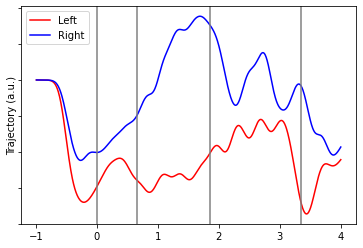

In [39]:
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# For Thalamus

In [40]:
units_df_ag['Region'].unique()

array(['left ALM', 'left Thalamus', 'left Midbrain'], dtype=object)

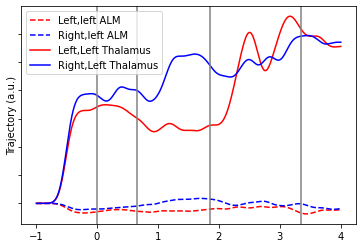

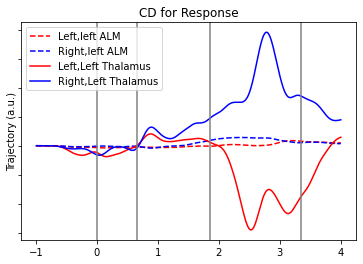

In [42]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'left Thalamus' and classification == 'good'")

trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

# st_l,st_r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

# with open('440959_thal_l.pkl', 'wb') as f:
#     pickle.dump(st_l, f)
# with open('440959_thal_r.pkl', 'wb') as f:
#     pickle.dump(st_r, f)
    
with open('440959_thal_l.pkl', 'rb') as f:
    st_l = pickle.load(f)
with open('440959_thal_r.pkl', 'rb') as f:
    st_r = pickle.load(f)
    
diff_cd = (-np.array(st_l)+np.array(st_r))
delay_avg_diff_ltha = diff_cd[:,449:569].mean(axis=1)
response_avg_diff_ltha = diff_cd[:,569:690].mean(axis=1)
newly_l_st = np.array(st_l).T.dot(delay_avg_diff_ltha)
newly_r_st = np.array(st_r).T.dot(delay_avg_diff_ltha)

fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,left ALM','Right,left ALM','Left,Left Thalamus','Right,Left Thalamus'])
plt.show()

newly_l_st = np.array(st_l).T.dot(response_avg_diff_ltha)
newly_r_st = np.array(st_r).T.dot(response_avg_diff_ltha)
newly_l = np.array(l).T.dot(response_avg_diff_lalm)
newly_r = np.array(r).T.dot(response_avg_diff_lalm)

fig, axs = plt.subplots(1, 1, sharex="all")
plt.title('CD for Response')
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,left ALM','Right,left ALM','Left,Left Thalamus','Right,Left Thalamus'])
plt.show()

In [43]:
from numpy import arccos, array
from numpy.linalg import norm
import math
def angles(u, v): 
    return arccos(u.dot(v)/(norm(u)*norm(v)))
print(math.degrees(angles(delay_avg_diff_ltha, response_avg_diff_ltha)), math.degrees(angles(delay_avg_diff_lalm, response_avg_diff_lalm)))

74.65413388459122 64.51306117497208


In [31]:
import scipy.stats
scipy.stats.pearsonr(delay_avg_diff_ltha, delay_avg_diff_lalm) 

ValueError: x and y must have the same length.

[0.74139641 0.1170968  0.0664753  0.02414688 0.02029839]


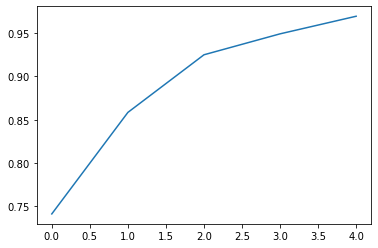

In [44]:
from sklearn.decomposition import PCA
%matplotlib inline
pca = PCA(n_components=5)
pca.fit(pd.DataFrame(st_l).T)
print(pca.explained_variance_ratio_[:5])
plt.plot(pca.explained_variance_ratio_.cumsum()[:10])
#plt.yticks(listOf_Yticks)

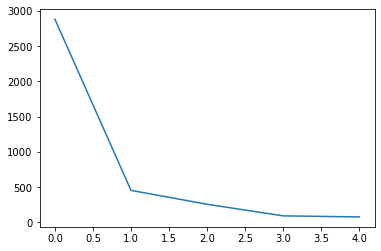

In [45]:
plt.plot(pca.explained_variance_)

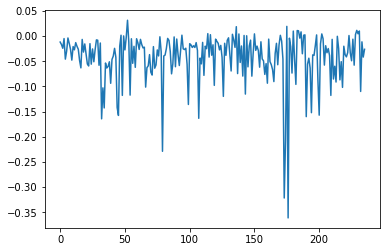

In [46]:
%matplotlib inline
pcacomp = np.array(pca.components_)
pcacomp.shape
plt.plot(pcacomp[0])

In [47]:
pca.get_covariance().shape

(236, 236)

(5, 1000)

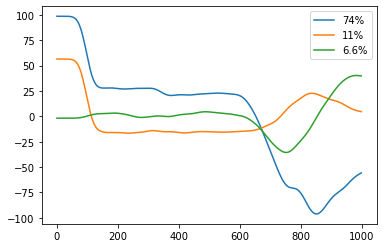

In [48]:
pca_comp = pca.fit_transform(pd.DataFrame(st_l).T)
plt.plot(pca_comp.T[0])
plt.plot(pca_comp.T[1])
plt.plot(pca_comp.T[2])
plt.legend(["74%", "11%", "6.6%"])

pca_comp.T.shape

(1000, 236) (236,)


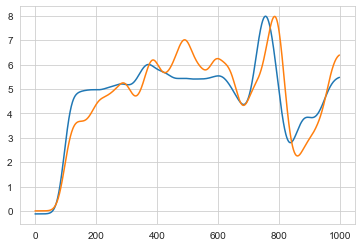

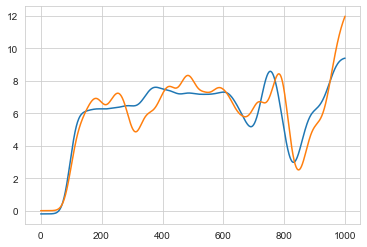

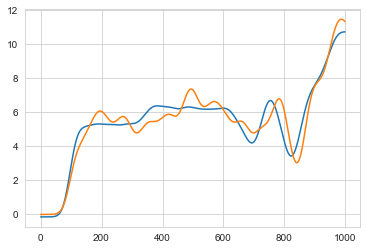

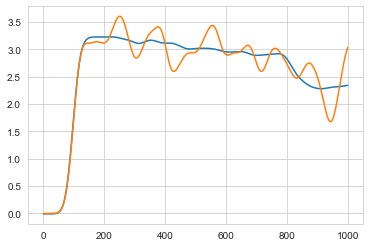

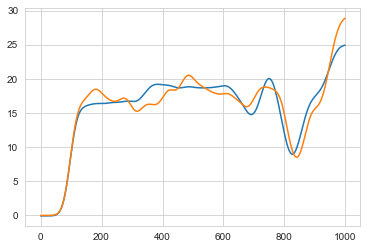

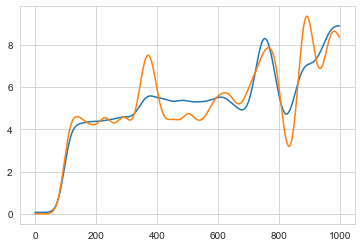

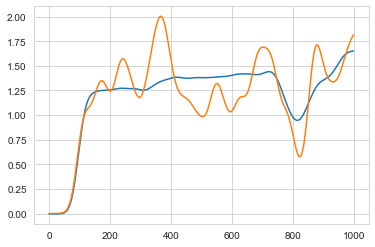

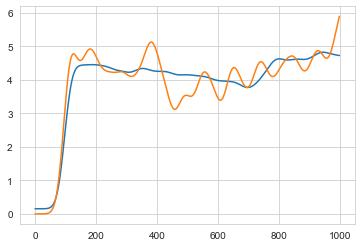

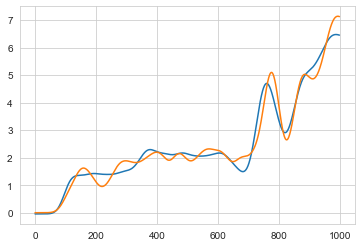

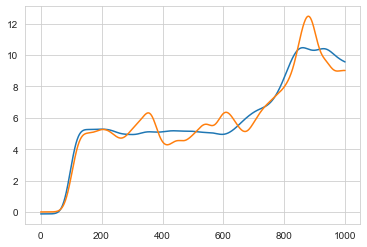

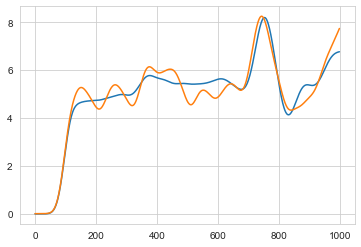

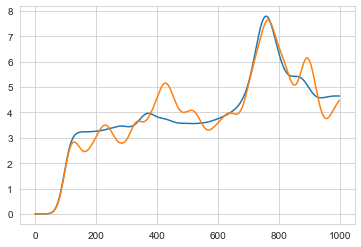

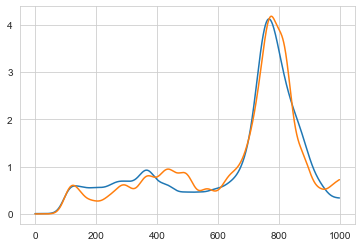

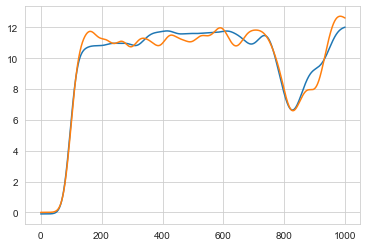

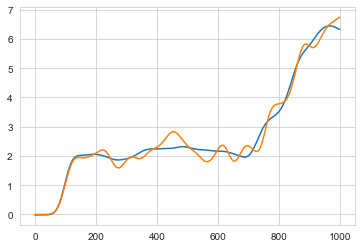

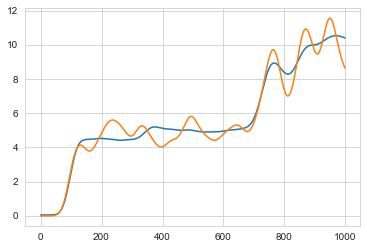

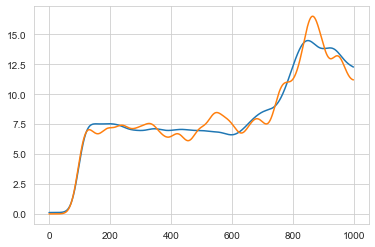

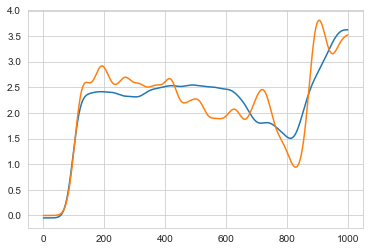

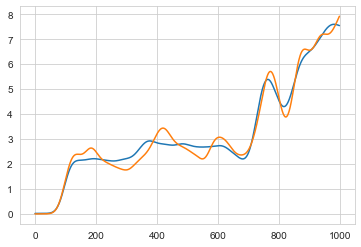

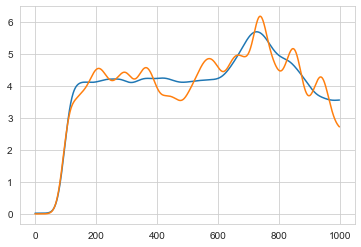

In [88]:
recon = pca_comp.dot(pcacomp) + pca.mean_
print(pca_comp.dot(pcacomp).shape ,  pca.mean_.shape)
for i in range(20):
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(recon.T[i])
    plt.plot(st_l[i])
    plt.show()

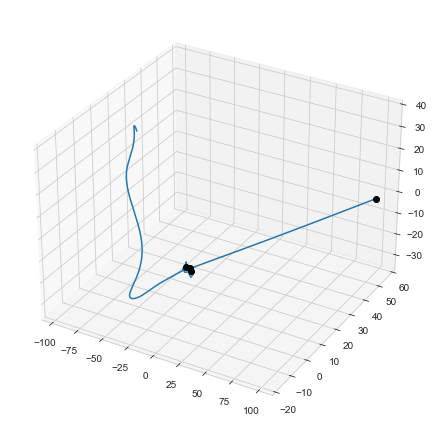

In [50]:
import seaborn as sb
%matplotlib widget
sb.set_style("whitegrid")

plt.figure(figsize=(6,6))
plot_axis = plt.axes (projection = '3d')
plot_axis.plot3D(pca_comp.T[0],pca_comp.T[1],pca_comp.T[2])
plot_axis.plot3D(pca_comp.T[0][0],pca_comp.T[1][0],pca_comp.T[2][0],color="black",marker='o')
plot_axis.plot3D(pca_comp.T[0][200],pca_comp.T[1][200],pca_comp.T[2][200],color="black",marker='o')
plot_axis.plot3D(pca_comp.T[0][330],pca_comp.T[1][330],pca_comp.T[2][330],color="black",marker='o')
plot_axis.plot3D(pca_comp.T[0][570],pca_comp.T[1][570],pca_comp.T[2][570],color="black",marker='o')
plt.tight_layout ()
plt.show ()

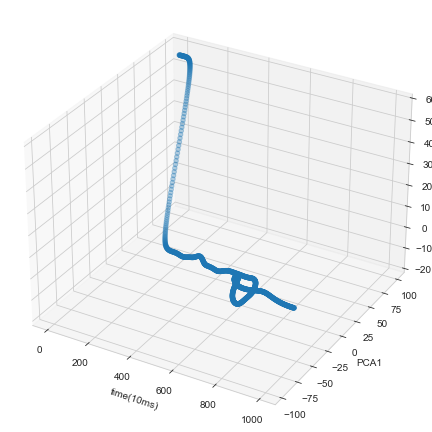

In [51]:
#%pip install ipympl
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False )
fig.add_axes(ax)
plot_pca = ax.scatter(range(1,1001),pca_comp.T[0],pca_comp.T[1])
ax.set_xlabel('time(10ms)')
ax.set_ylabel('PCA1')
ax.set_zlabel('PCA2')
plt.show()

In [60]:
#pca from scratch
data_st_l = pd.DataFrame(st_l).T
X_meaned = data_st_l - np.mean(data_st_l , axis = 0)

cov_mat = np.cov(X_meaned , rowvar = False)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 5
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

X_reduced.shape

(1000, 5)

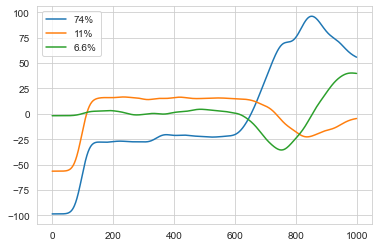

In [61]:
%matplotlib inline
plt.plot(X_reduced.T[0])
plt.plot(X_reduced.T[1])
plt.plot(X_reduced.T[2])
plt.legend(["74%", "11%", "6.6%"])

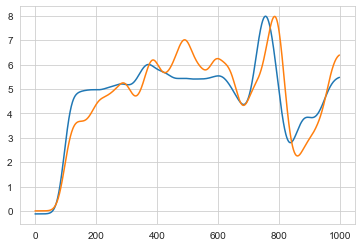

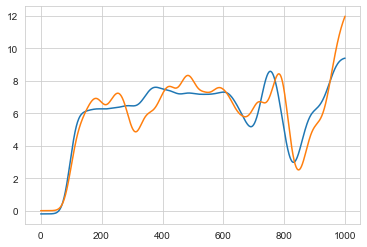

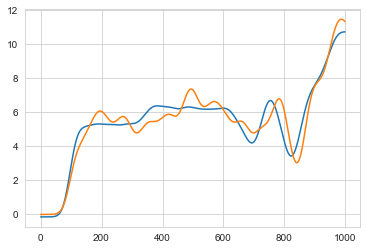

In [95]:
recon = X_reduced.dot(eigenvector_subset.T) #+ np.mean(data_st_l , axis = 0)
#print(X_reduced.dot(eigenvector_subset.T).shape , np.mean(data_st_l , axis = 0).shape)
for i in range(3):
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(recon.T[i] + np.mean(data_st_l , axis = 0)[i])
    plt.plot(st_l[i])
    plt.show()

# Multiregional PCA(Left Trials)

In [96]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query("classification == 'good'")
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

# l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

# import pickle
# with open('440958_all_l.pkl', 'wb') as f:
#     pickle.dump(l, f)
# with open('440958_all_r.pkl', 'wb') as f:
#     pickle.dump(r, f)

In [97]:
with open('440958_all_l.pkl', 'rb') as f:
    l = pickle.load(f)
with open('440958_all_r.pkl', 'rb') as f:
    r = pickle.load(f)

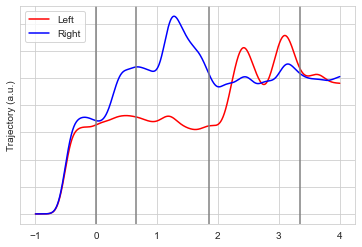

In [98]:
diff_cd = (-np.array(l)+np.array(r))

delay_avg_diff = diff_cd[:,449:570].mean(axis=1)
response_avg_diff = diff_cd[:,569:690].mean(axis=1)

newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

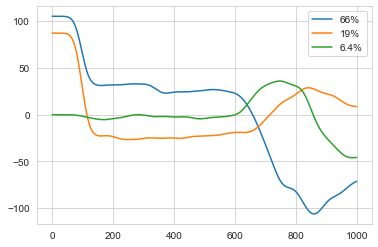

In [106]:
data_l = pd.DataFrame(l).T
X_meaned = data_l - np.mean(data_l , axis = 0)

cov_mat = np.cov(X_meaned , rowvar = False)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 5
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

%matplotlib inline
plt.plot(X_reduced.T[0])
plt.plot(X_reduced.T[1])
plt.plot(X_reduced.T[2])
plt.legend(["66%", "19%", "6.4%"])

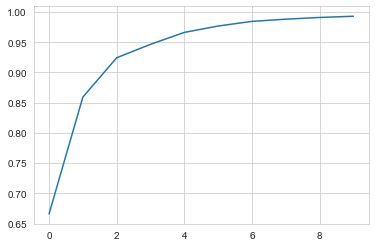

In [112]:
plt.plot((sorted_eigenvalue/sorted_eigenvalue.sum()).cumsum()[:10])

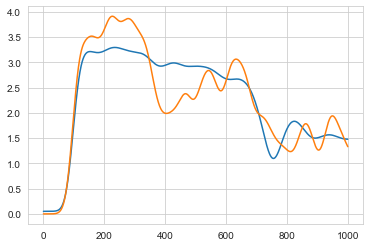

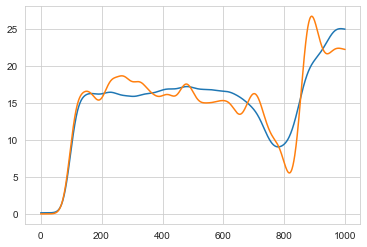

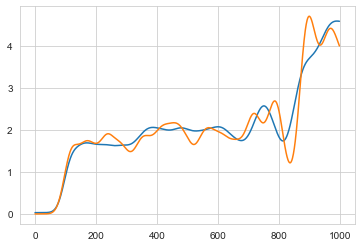

In [113]:
recon = X_reduced.dot(eigenvector_subset.T) #+ np.mean(data_st_l , axis = 0)
#print(X_reduced.dot(eigenvector_subset.T).shape , np.mean(data_st_l , axis = 0).shape)
for i in range(3):
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(recon.T[i] + np.mean(data_l , axis = 0)[i])
    plt.plot(l[i])
    plt.show()

# Distribution during delay and go phase

In [30]:
def get_phases_rate_graph(Trial_Data1,Trial_Data2,sigma):

    spike_data = []
    
    for unit in units_Data.reset_index().id:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_go_l = []
        trial_spikes_go_r = []
        trial_spikes_delay_l = []
        trial_spikes_delay_r = []
        trial_sample_l = []
        trial_sample_r = []
        
    
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_l.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_l.append(aligned_spikes1)
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_r.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_r.append(aligned_spikes1)        
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_r.append(aligned_spikes1)   
              
    return trial_sample_l, trial_sample_r, trial_spikes_go_l,trial_spikes_go_r,trial_spikes_delay_l,trial_spikes_delay_r     

def get_freq_edge(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(31)/20) + 1.80)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_1(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(25)/20) + 0.60)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_2(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(14)/20) + 0)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]


sample_l, sample_r, go_l,go_r,delay_l,delay_r = get_phases_rate_graph(trials_Data_L,trials_Data_R,0.1)
freq_sample_l,edges2 = get_freq_edge_2(sample_l,trials_Data_L)
freq_sample_r,edges2 = get_freq_edge_2(sample_r,trials_Data_R)
freq_go_l,edges = get_freq_edge(go_l,trials_Data_L)
freq_go_r,edges = get_freq_edge(go_r,trials_Data_R)
freq_delay_l,edges1 = get_freq_edge_1(delay_l,trials_Data_L)
freq_delay_r,edges1 = get_freq_edge_1(delay_r,trials_Data_R)

<AxesSubplot:ylabel='Density'>

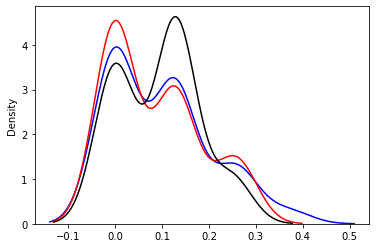

In [31]:
#Delay vs Go(Phases vs Phases)(Yet to finish)
sns.kdeplot(list(freq_go_l) + list(freq_go_r), c='b')
sns.kdeplot(list(freq_delay_l) + list(freq_delay_r), c='r')
sns.kdeplot(list(freq_sample_l) + list(freq_sample_r), c='black')

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.        , 0.01234568, 0.02469136, 0.03703704, 0.04938272,
        0.0617284 , 0.07407407, 0.08641975, 0.09876543, 0.11111111,
        0.12345679, 0.13580247, 0.14814815, 0.16049383, 0.17283951,
        0.18518519, 0.19753086, 0.20987654, 0.22222222, 0.2345679 ,
        0.24691358]),
 <BarContainer object of 20 artists>)

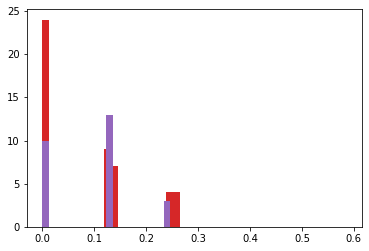

In [32]:
plt.hist(list(freq_go_r) + list(freq_go_l), bins=20)
plt.hist(list(freq_delay_r) + list(freq_delay_l), bins=20)
plt.hist(list(freq_sample_r) + list(freq_sample_l), bins=20)